In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


**Customer Segmentation is a practice of dividing customers into groups that are similiar in specific ways.**
It became essential nowadays to understand our customers which will increase the revenue of our company. It will generate a better understanding between a customer and a organization.

****Step 1: Importing the data set**


In [39]:
df=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Gender color contains categorical value so we have to change it into numerical values**

In [40]:
df["Gender"]=df["Gender"].replace("Male",1)
df["Gender"]=df["Gender"].replace("Female",0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Checking if any column contains null value**

In [41]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [42]:
df.shape

(200, 5)

**Exploratory Data Analysis**
finding the relationship between different data members in the dataset

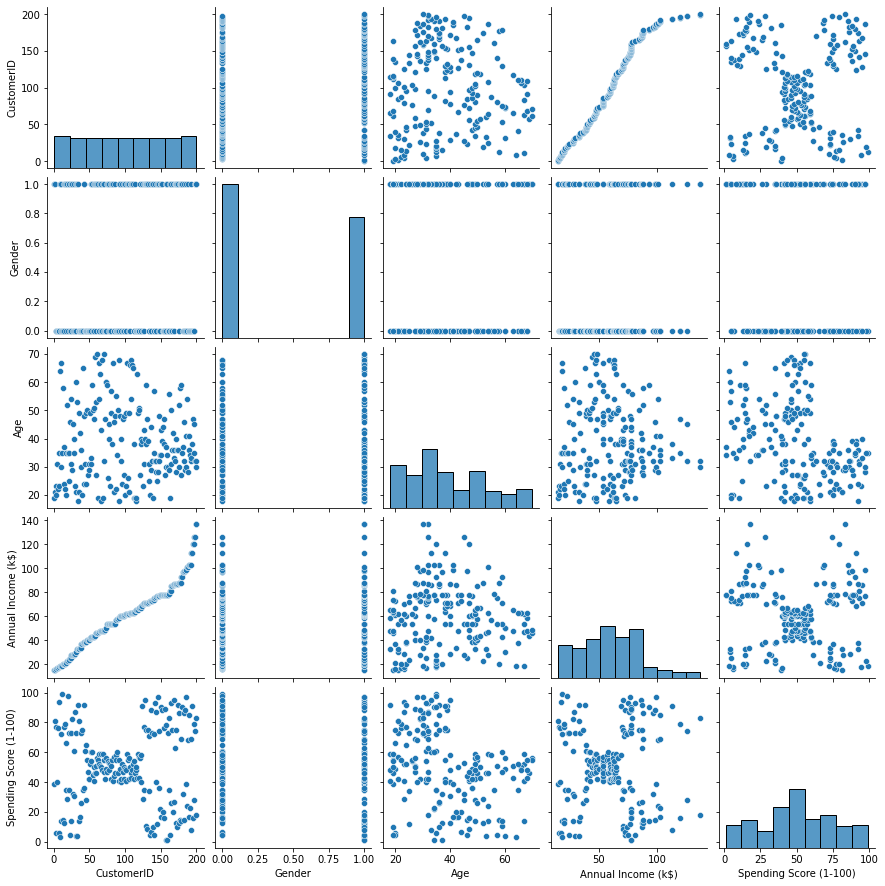

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

**Splitting the customers between various age groups**

In [44]:

age18_25=df.Age[(df.Age>=18) & (df.Age<=25)]
age26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age45_55=df.Age[(df.Age>=45) & (df.Age<=55)]
age55above=df.Age[(df.Age>=56)]
agex=["age18_25","age26_35","age36_45","age45_55","age55above"]
agey=[len(age18_25),len(age26_35),len(age36_45),len(age45_55),len(age55above)]

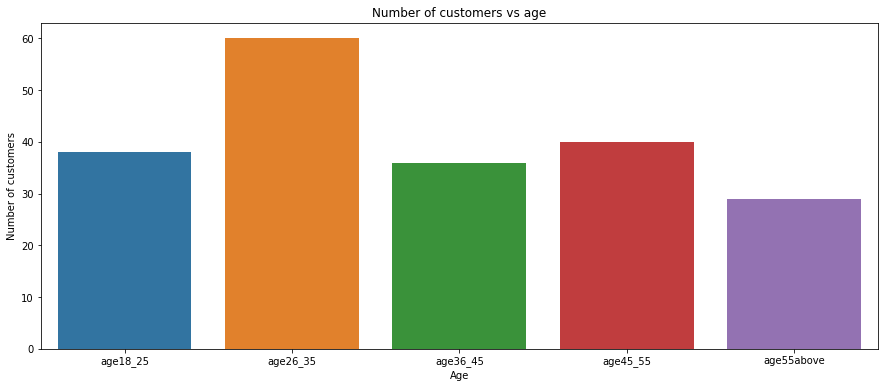

In [45]:
plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey)
plt.title("Number of customers vs age")
plt.xlabel("Age")
plt.ylabel("Number of customers")
plt.show()

**From the above graph we generalize that maximum number of customers lie between the age of 26 to 35**

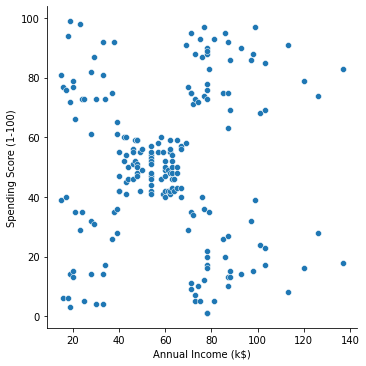

In [46]:

sns.relplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=df)

****From above graph we infer that the customers whoes annual income lies between 40k to 60k has a spending score between 40 to 60

**Splitting the customers on basis of their annual income**

In [47]:
an0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
an31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
an61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
an90above=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)]
anux=["an0_30","an31_60","an61_90","an90above"]
anuy=[len(an0_30),len(an31_60),len(an61_90),len(an90above)]

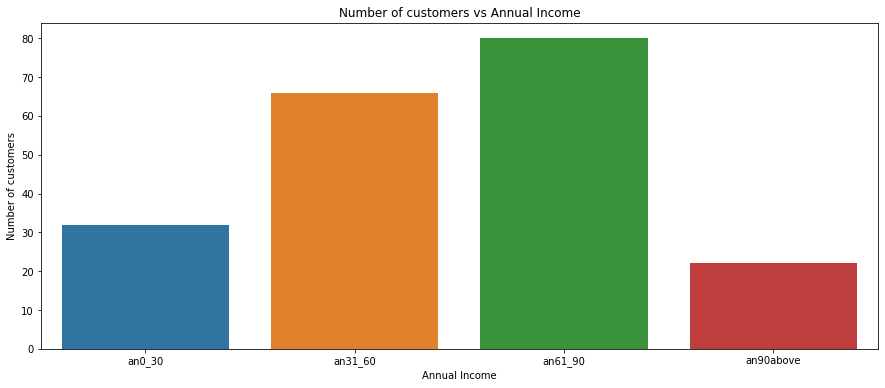

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x=anux,y=anuy)
plt.title("Number of customers vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of customers")
plt.show()

**from above graph we infer that maximum number of customers have annual income between 60-90**

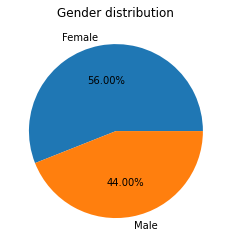

In [49]:
labels=["Female","Male"]
size=df["Gender"].value_counts()
plt.pie(size,labels=labels,autopct = '%.2f%%')
plt.title("Gender distribution")
plt.show()

***We can infer from the above chart that female visitors are high in the mall as compared to men***

**Step 3: Using KMeans Algorithm to divide the customers into clusters**

****

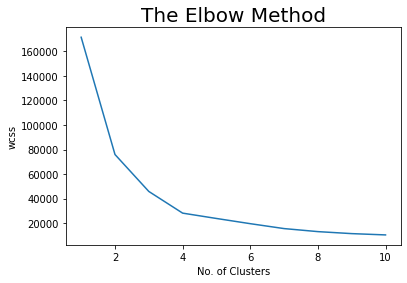

In [50]:
X1=df.loc[:,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X1)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**We got the optimal value of cluster i.e 4**

In [51]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Text(0, 0.5, 'Spending Score (1-100)')

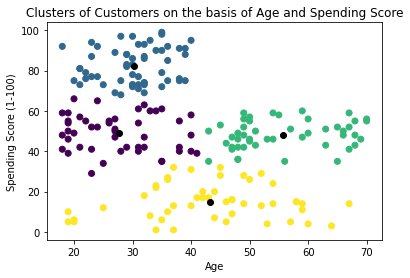

In [52]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers on the basis of Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

**This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall.**

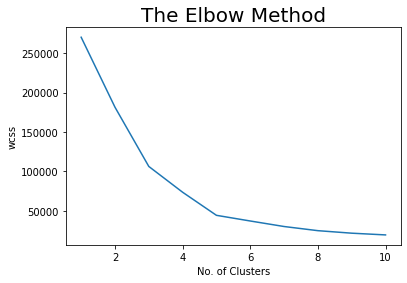

In [53]:
X2=df.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X2)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**From the above graph optimum value of clusters is 5**

In [54]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


Text(0, 0.5, 'Spending Score (1-100)')

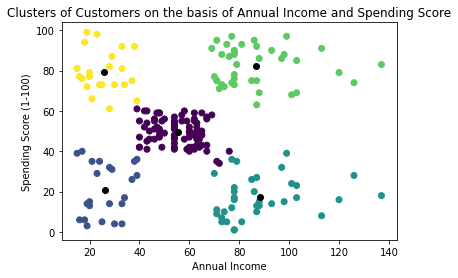

In [55]:
plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers on the basis of Annual Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")

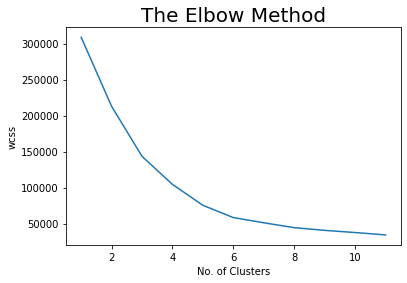

In [56]:
X3=df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,12):
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(X3)
    wcss.append(km.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Optimum value of Cluster is 5**

In [57]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X3)

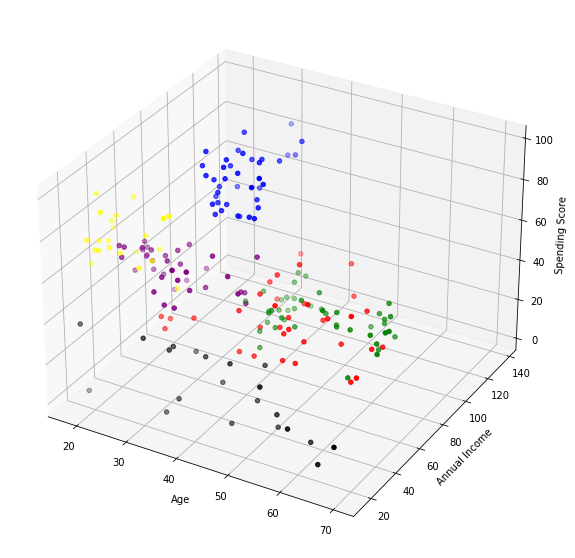

In [58]:
from mpl_toolkits.mplot3d import Axes3D
df["label"]=label
# Creating figure
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter(df.Age[df.label==0],df["Annual Income (k$)"][df.label==0],df["Spending Score (1-100)"][df.label==0],color="red")
ax.scatter(df.Age[df.label==1],df["Annual Income (k$)"][df.label==1],df["Spending Score (1-100)"][df.label==1],color="yellow")
ax.scatter(df.Age[df.label==2],df["Annual Income (k$)"][df.label==2],df["Spending Score (1-100)"][df.label==2],color="green")
ax.scatter(df.Age[df.label==3],df["Annual Income (k$)"][df.label==3],df["Spending Score (1-100)"][df.label==3],color="blue")
ax.scatter(df.Age[df.label==4],df["Annual Income (k$)"][df.label==4],df["Spending Score (1-100)"][df.label==4],color="purple")
ax.scatter(df.Age[df.label==5],df["Annual Income (k$)"][df.label==5],df["Spending Score (1-100)"][df.label==5],color="black")

plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending Score")
plt.show()

****We can clearly see the 6 cluster with distinct separation between each datapoints.
using this info we can run target advertisment for diffrent group with diffrent need.
 to increase our sales and profit.**

**Number of Customers in cluster 0**

In [60]:
df[df.label==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
126,127,1,43,71,35,0
128,129,1,59,71,11,0
130,131,1,47,71,9,0
134,135,1,20,73,5,0
136,137,0,44,73,7,0
138,139,1,19,74,10,0
140,141,0,57,75,5,0
144,145,1,25,77,12,0
146,147,1,48,77,36,0
148,149,0,34,78,22,0


**Number of customers in cluster 1**

In [61]:
df[df.label==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
1,2,1,21,15,81,1
3,4,0,23,16,77,1
5,6,0,22,17,76,1
7,8,0,23,18,94,1
9,10,0,30,19,72,1
11,12,0,35,19,99,1
13,14,0,24,20,77,1
15,16,1,22,20,79,1
17,18,1,20,21,66,1
19,20,0,35,23,98,1


**Number of customers in cluster 2**

In [62]:
df[df.label==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
40,41,0,65,38,35,2
42,43,1,48,39,36,2
46,47,0,50,40,55,2
50,51,0,49,42,52,2
53,54,1,59,43,60,2
54,55,0,50,43,45,2
55,56,1,47,43,41,2
56,57,0,51,44,50,2
57,58,1,69,44,46,2
59,60,1,53,46,46,2


**Number of customers in cluster 3**

In [65]:
df[df.label==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
123,124,1,39,69,91,3
125,126,0,31,70,77,3
127,128,1,40,71,95,3
129,130,1,38,71,75,3
131,132,1,39,71,75,3
133,134,0,31,72,71,3
135,136,0,29,73,88,3
137,138,1,32,73,73,3
139,140,0,35,74,72,3
141,142,1,32,75,93,3


**Number of customers in cluster 4**

In [66]:
df[df.label==4]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
43,44,0,31,39,61,4
47,48,0,27,40,47,4
48,49,0,29,40,42,4
49,50,0,31,40,42,4
51,52,1,33,42,60,4
52,53,0,31,43,54,4
58,59,0,27,46,51,4
61,62,1,19,46,55,4
65,66,1,18,48,59,4
68,69,1,19,48,59,4


**Number of customers in cluster 5**

In [64]:
df[df.label==5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,5
2,3,0,20,16,6,5
4,5,0,31,17,40,5
6,7,0,35,18,6,5
8,9,1,64,19,3,5
10,11,1,67,19,14,5
12,13,0,58,20,15,5
14,15,1,37,20,13,5
16,17,0,35,21,35,5
18,19,1,52,23,29,5
